In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('data_9786.csv')
df

,date,message,channel_name,address,cost,gender,people_needed,long_term,phone_number,utilities,deposit
0,2024-09-04 22:16:06,Нужна квартира на субаренде Мекенжай мкр 5679 ...,Уральск Квартира Орал КВАРТИРА Аренда,Мекенжай мкр 5679,90000.0,NaN,NaN,1.0,77082484051,1.0,NaN
1,2024-09-03 13:20:20,Нужна 1 комната изолированная можно и как подс...,ПОДСЕЛЕНИЕ АЛМАТЫ КВАРТИРА,NaN,70000.0,male,1.0,NaN,77771396830,0.0,NaN
2,2024-09-12 21:46:19,Женатая пара ищут себе квартиру на долгий срок...,ПОДСЕЛЕНИЕ АЛМАТЫ,NaN,60000.0,female,2.0,1.0,87754624648,0.0,NaN
3,2024-01-31 15:51:18,Срочно Пара без вредных привычек снимет 12 ком...,Аренда квартир Алматы - Чат,NaN,150000.0,NaN,2.0,1.0,7 778 232 56 99,0.0,NaN
4,2024-07-29 17:35:26,Нужна квартира на длительный срок Мекенжай сит...,Уральск Квартира Орал КВАРТИРА Аренда,Мекенжай сити центр казииту,90000.0,NaN,NaN,1.0,77073690688,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29711,2024-03-31 22:48:32,Подселение Бірге тұру Квартира ға 2 кыз керек ...,Уральск Квартира Орал КВАРТИРА Аренда,центрда,NaN,female,2.0,0.0,87077357430,0.0,NaN
29712,2024-03-27 15:27:53,Подселение Бірге тұру Остановка Школьник 1 қыз...,Уральск Квартира Орал КВАРТИРА Аренда,NaN,NaN,female,1.0,NaN,8 776 2000713,1.0,NaN
29713,2024-03-17 20:27:15,Подселение Бірге тұру 1 қыз Квартираға қасына ...,Уральск Квартира Орал КВАРТИРА Аренда,Казииту до базар Назарбаев проспект,NaN,female,1.0,NaN,87052195242,0.0,NaN
29714,2024-03-17 18:57:51,Нужна квартира суточный на 2 дня 2х комнатный ...,Уральск Квартира Орал КВАРТИРА Аренда,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


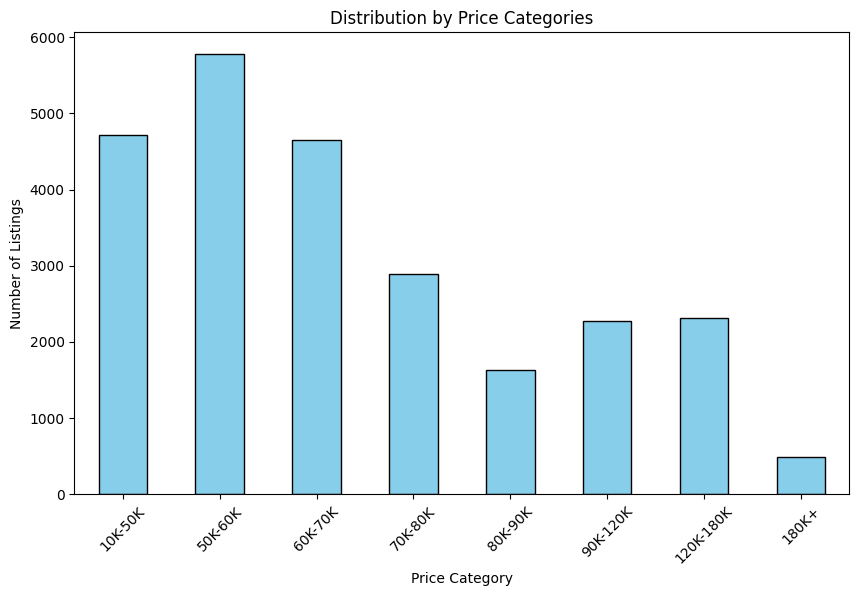

In [4]:
# 2. Распределение цен на аренду жилья

# Determine price range categories
bins = [0, 50000, 60000, 70000, 80000, 90000, 120000, 180000, float('inf')]
labels = ['10K-50K', '50K-60K', '60K-70K', '70K-80K', '80K-90K', '90K-120K', '120K-180K', '180K+']

# Categorize prices into ranges
cost_category = pd.cut(df['cost'], bins=bins, labels=labels, right=False)

# Calculate the count of listings in each category
cost_summary = cost_category.value_counts().sort_index()

plt.figure(figsize=(10, 6))
cost_summary.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution by Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

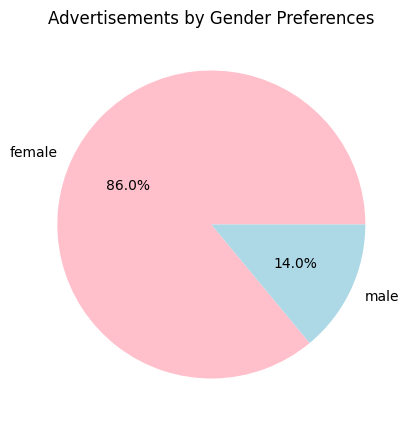

In [5]:
# 3. Число объявлений по гендерным предпочтениям

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 5))
# Plot the gender distribution as a pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue', 'grey'])
plt.title('Advertisements by Gender Preferences')
plt.ylabel('')  # Remove the y-axis label
plt.show()


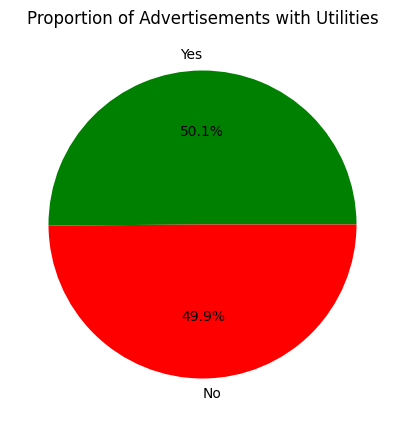

In [6]:
# 4. Доля объявлений с коммунальными услугами, включёнными в стоимость

# Count the occurrences of utility availability
utilities_counts = df['utilities'].value_counts()

plt.figure(figsize=(8, 5))
# Plot the distribution of advertisements with and without utilities as a pie chart
utilities_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Yes', 'No'], colors=['green', 'red'])
plt.title('Proportion of Advertisements with Utilities')
plt.ylabel('')  # Remove the y-axis label
plt.show()


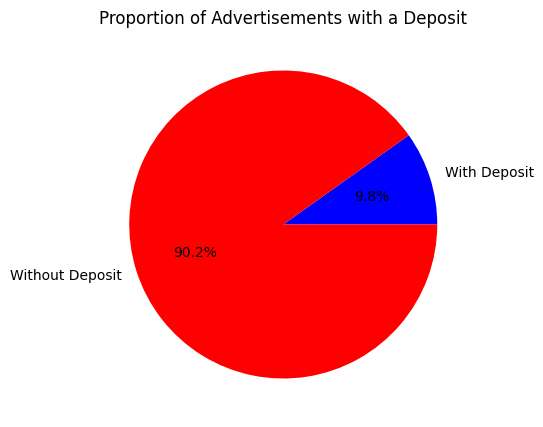

In [7]:
# 5. Доля объявлений с депозитом

# Calculate the count of listings with and without a deposit
has_deposit = df['deposit'].notnull().sum()
no_deposit = len(df) - has_deposit

plt.figure(figsize=(8, 5))
# Plot the proportion of listings with and without a deposit as a pie chart
plt.pie([has_deposit, no_deposit], labels=['With Deposit', 'Without Deposit'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Proportion of Advertisements with a Deposit')
plt.show()

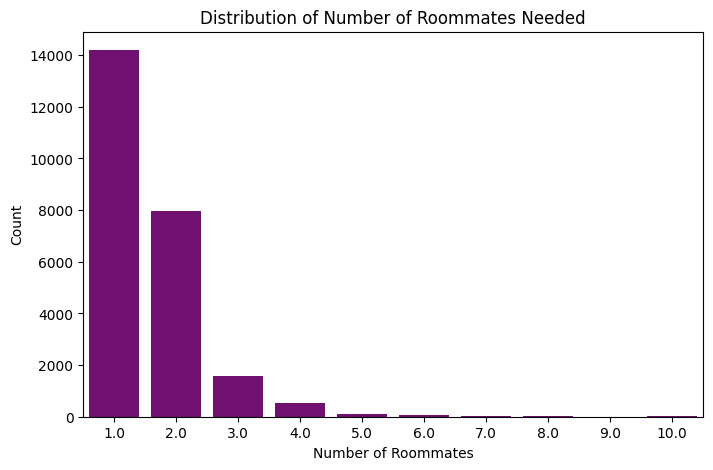

In [8]:
# 6. Распределение количества необходимых соседей

plt.figure(figsize=(8, 5))
# Plot the distribution of the number of roommates needed
sns.countplot(x=df['people_needed'], color='purple')
plt.title('Distribution of Number of Roommates Needed')
plt.xlabel('Number of Roommates')
plt.ylabel('Count')
plt.show()

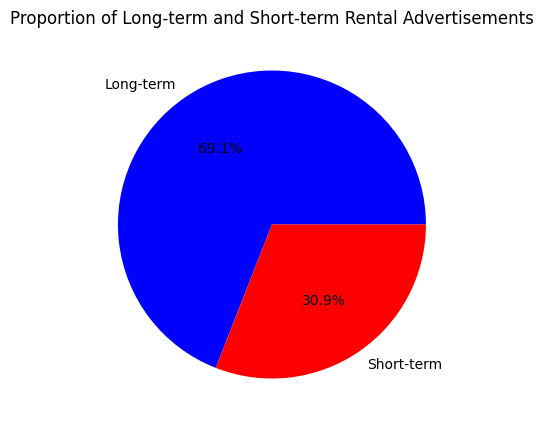

In [9]:
# 7. Доля объявлений для долгосрочной аренды против краткосрочной

# Count the occurrences of long-term and short-term rental advertisements
long_term_counts = df['long_term'].value_counts()

plt.figure(figsize=(8, 5))
# Plot the distribution of long-term vs. short-term rental advertisements as a pie chart
long_term_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Long-term', 'Short-term'], colors=['blue', 'red'])
plt.title('Proportion of Long-term and Short-term Rental Advertisements')
plt.ylabel('')  # Remove the y-axis label
plt.show()

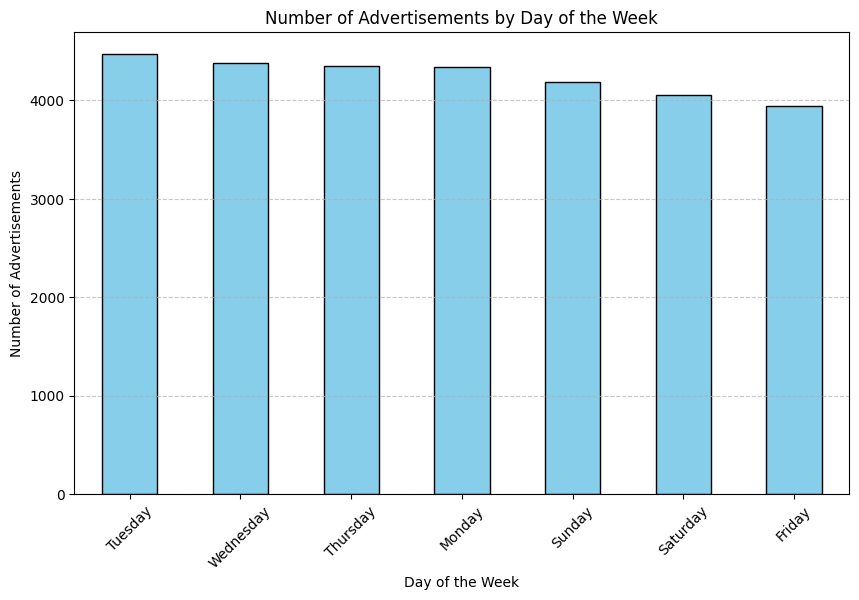

In [10]:
# Ensure that data is correctly loaded and prepared
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 8. Количество объявлений по дням недели
day_counts = df['date'].dt.day_name().value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Advertisements by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



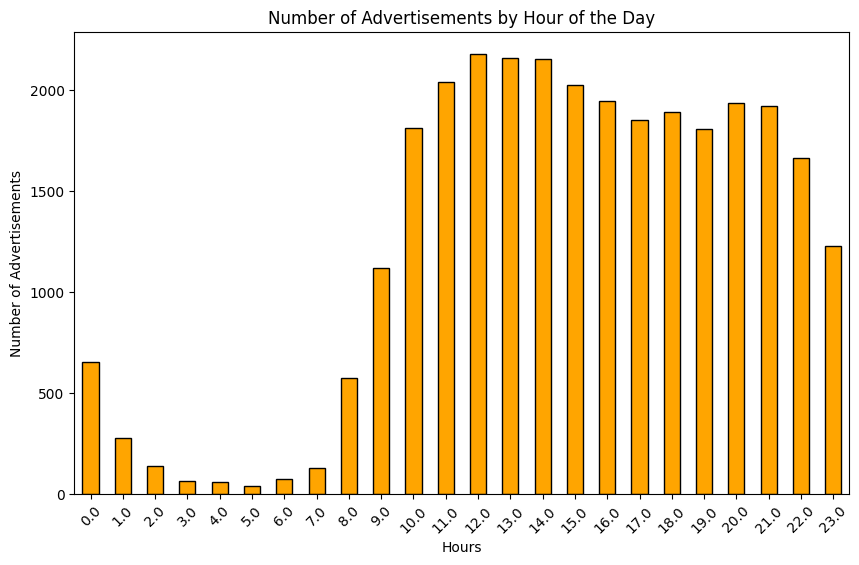

In [11]:
# 9. Количество объявлений по часам суток

# Count the number of advertisements for each hour of the day
hour_counts = df['date'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10, 6))
# Plot the data showing the number of advertisements by hour
hour_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Advertisements by Hour of the Day')
plt.xlabel('Hours')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45)
plt.show()

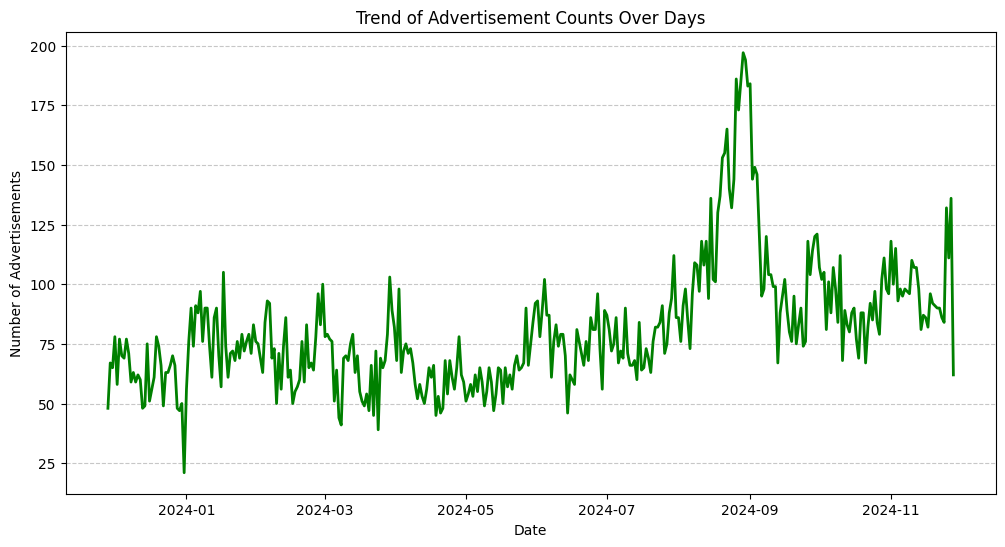

In [ ]:
# 10. Тренд изменения количества объявлений по дням (суммарная активность)

# Count the number of advertisements for each specific date
daily_counts = df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Plot the trend of advertisement counts over time
daily_counts.plot(color='green', linewidth=2)
ax.set_facecolor('black')
plt.title('Trend of Advertisement Counts Over Days')
plt.xlabel('Date')
plt.ylabel('Number of Advertisements')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

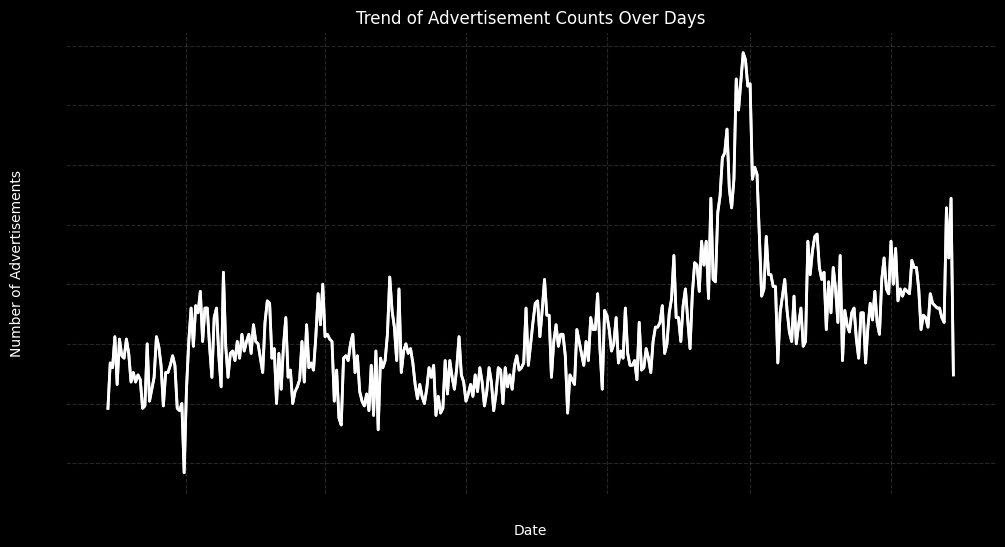

In [42]:
# 10. Тренд изменения количества объявлений по дням (суммарная активность)

# Count the number of advertisements for each specific date
daily_counts = df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Plot the trend of advertisement counts over time
daily_counts.plot(color='white', linewidth=2, linestyle='-', alpha=0.9)
plt.gcf().set_facecolor('black')
ax = daily_counts.plot(color='white', linewidth=2)
ax.set_facecolor('black')
plt.title('Trend of Advertisement Counts Over Days', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Number of Advertisements', color='white')
plt.grid(axis='both', linestyle='--', alpha=0.3, color='gray')
plt.show()

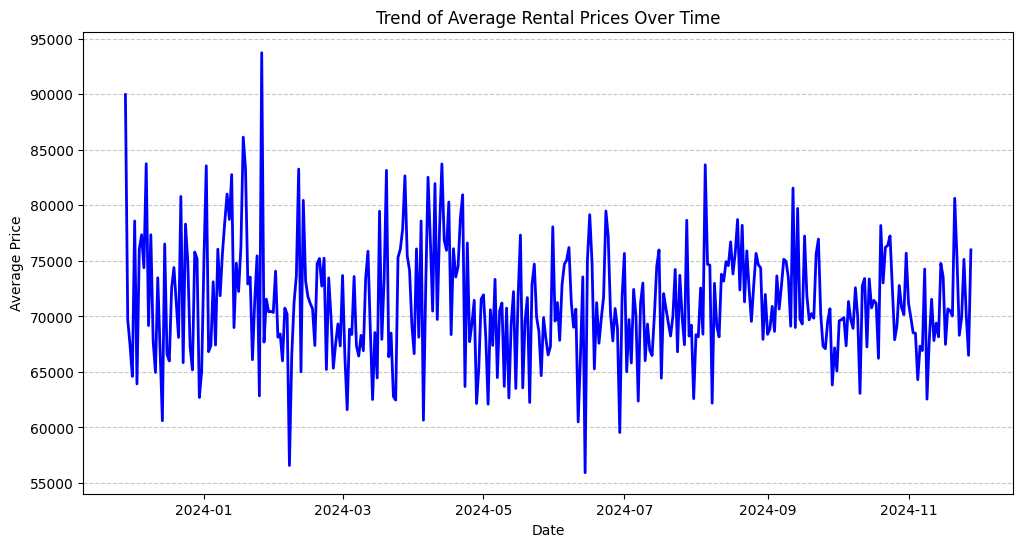

In [30]:
# 11. Изменение средних цен на аренду жилья со временем

# Calculate the daily average rental price
daily_avg_price = df.groupby(df['date'].dt.date)['cost'].mean()

plt.figure(figsize=(12, 6))
# Plot the trend of average rental prices over time
daily_avg_price.plot(color='blue', linewidth=2)
plt.title('Trend of Average Rental Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

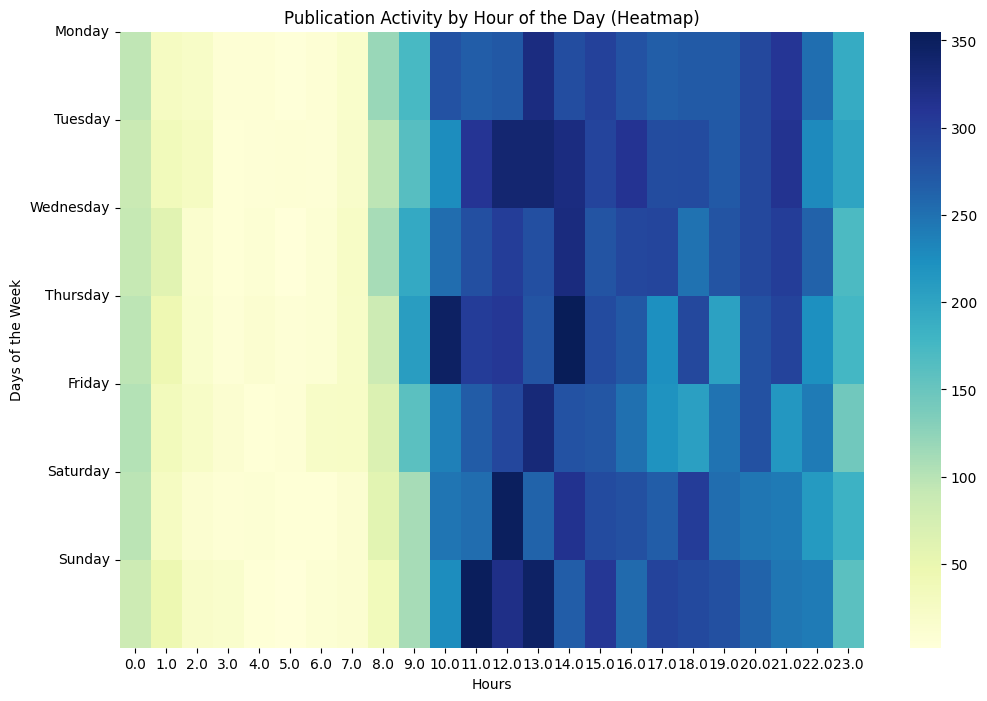

In [14]:
# 12. Активность публикаций в разные часы суток (тепловая карта)

# Create a heatmap of publication activity by day of the week and hour
heatmap_data = df.groupby([df['date'].dt.dayofweek, df['date'].dt.hour]).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='d')
plt.title('Publication Activity by Hour of the Day (Heatmap)')
plt.xlabel('Hours')
plt.ylabel('Days of the Week')
plt.yticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

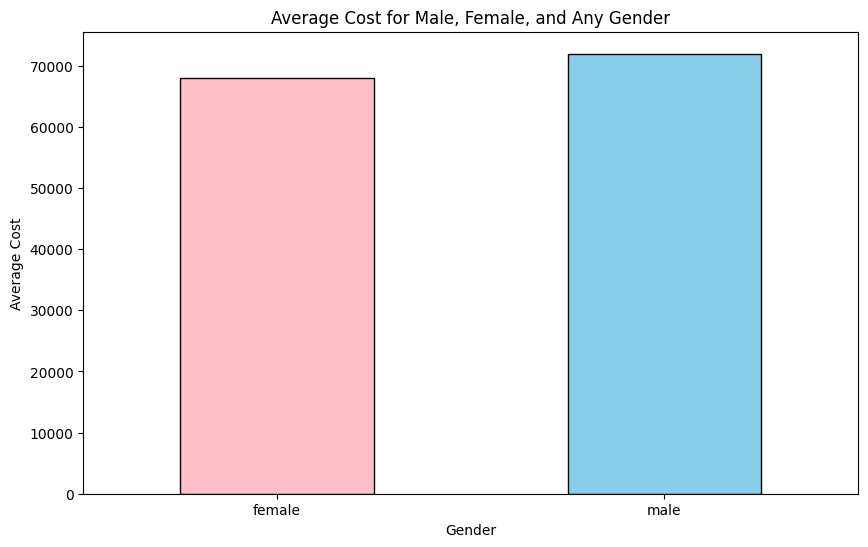

In [15]:
# 15. Средняя стоимость для мужчин и женщин

# Calculate the average rental price by gender and sort the values
avg_price_by_gender = df.groupby('gender')['cost'].mean().sort_values()

plt.figure(figsize=(10, 6))
# Plot the average price by gender as a bar chart
avg_price_by_gender.plot(kind='bar', color=['pink', 'skyblue'], edgecolor='black')
plt.title('Average Cost for Male, Female, and Any Gender')
plt.xlabel('Gender')
plt.ylabel('Average Cost')
plt.xticks(rotation=0)
plt.show()

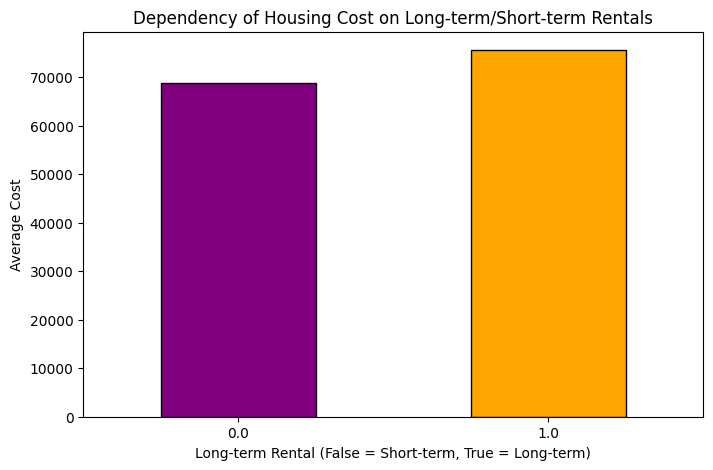

In [16]:
# 17. Зависимость стоимости жилья от долгосрочной/краткосрочной аренды

# Calculate the average rental price by term (long-term vs. short-term)
avg_price_by_term = df.groupby('long_term')['cost'].mean()

plt.figure(figsize=(8, 5))
# Plot the average rental price by term as a bar chart
avg_price_by_term.plot(kind='bar', color=['purple', 'orange'], edgecolor='black')
plt.title('Dependency of Housing Cost on Long-term/Short-term Rentals')
plt.xlabel('Long-term Rental (False = Short-term, True = Long-term)')
plt.ylabel('Average Cost')
plt.xticks(rotation=0)
plt.show()

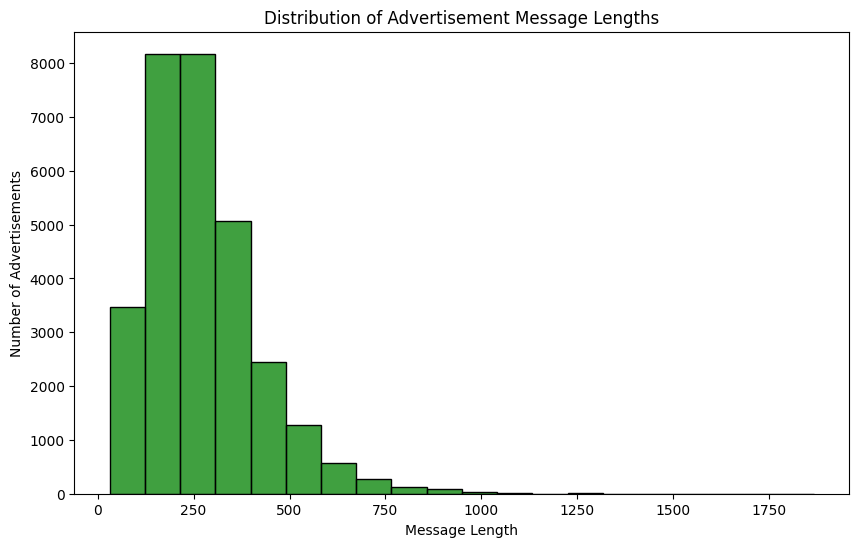

In [17]:
# 22. Распределение длины сообщений объявлений

# Calculate the lengths of messages in the 'message' column, excluding missing values
message_lengths = df['message'].dropna().str.len()

plt.figure(figsize=(10, 6))
# Plot the distribution of message lengths as a histogram
sns.histplot(message_lengths, bins=20, color='green')
plt.title('Distribution of Advertisement Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Number of Advertisements')
plt.show()

In [18]:
# 24. Частота упоминания "ЖК" (жилых комплексов) в текстах

jkc_mentions = df['message'].str.contains(r'\bЖК\b', na=False, case=False).sum()

print(f"Frequency of mentioning 'ЖК': {jkc_mentions}")

Frequency of mentioning 'ЖК': 5932


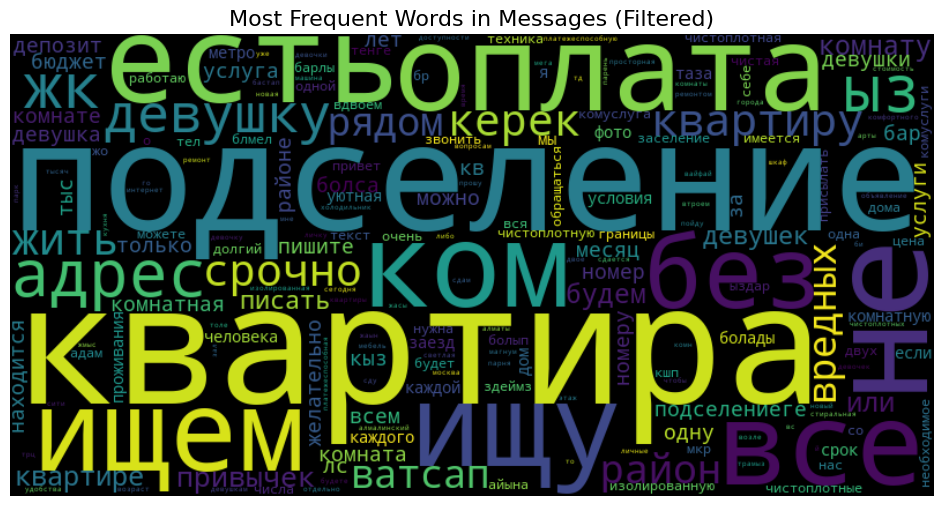

In [19]:
# Define a list of stopwords
stopwords = {'и', 'в', 'на', 'с', 'по', 'что', 'из', 'для', 'а', 'это', 'от', 'у', 'к', 'до', 'как', 'же', 'х', 'тг'}

# Process the text
messages = df['message'].dropna()
all_words = ' '.join(messages)

# Clean the text
cleaned_words = re.sub(r'[^а-яА-Яa-zA-Z\s]', '', all_words).lower()
words = cleaned_words.split()

# Filter out stopwords
filtered_words = [word for word in words if word not in stopwords]

# Count the frequency of words
word_counts = Counter(filtered_words)

# Create a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    colormap='viridis'
).generate_from_frequencies(word_counts)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Messages (Filtered)', fontsize=16)
plt.axis('off')
plt.show()

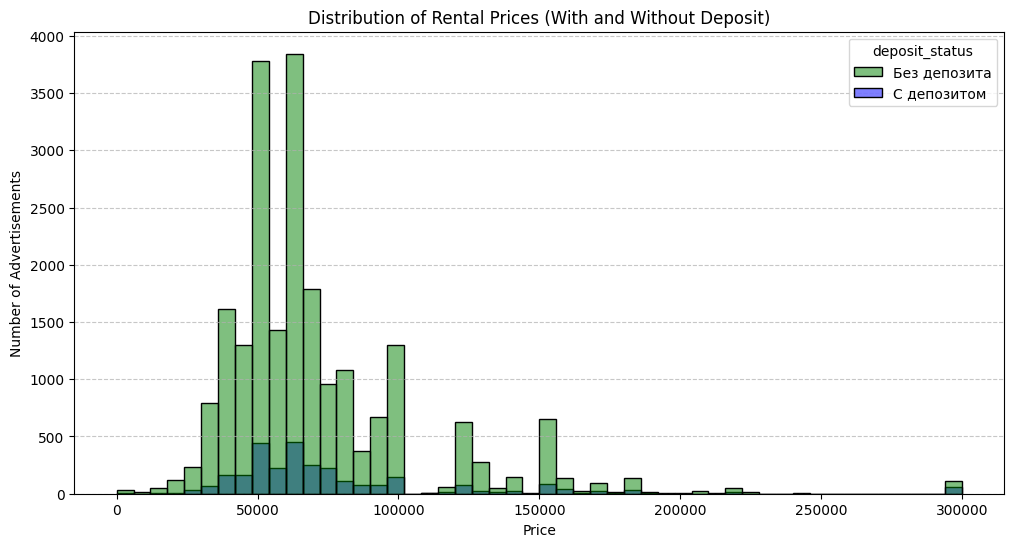

In [20]:
# Temporarily handle missing values in the 'deposit' column
df_copy = df.copy()
df_copy['deposit'] = pd.to_numeric(df_copy['deposit'], errors='coerce').fillna(0)

# Create a temporary 'deposit_status' column
df_copy['deposit_status'] = df_copy['deposit'].apply(lambda x: 'Без депозита' if x == 0 else 'С депозитом')

# Plot the distribution of rental prices with and without a deposit
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_copy,
    x='cost',
    hue='deposit_status',
    bins=50,
    kde=False,
    palette={'Без депозита': 'green', 'С депозитом': 'blue'}
)
plt.title('Distribution of Rental Prices (With and Without Deposit)')
plt.xlabel('Price')
plt.ylabel('Number of Advertisements')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127747 (\N{NIGHT WITH STARS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.

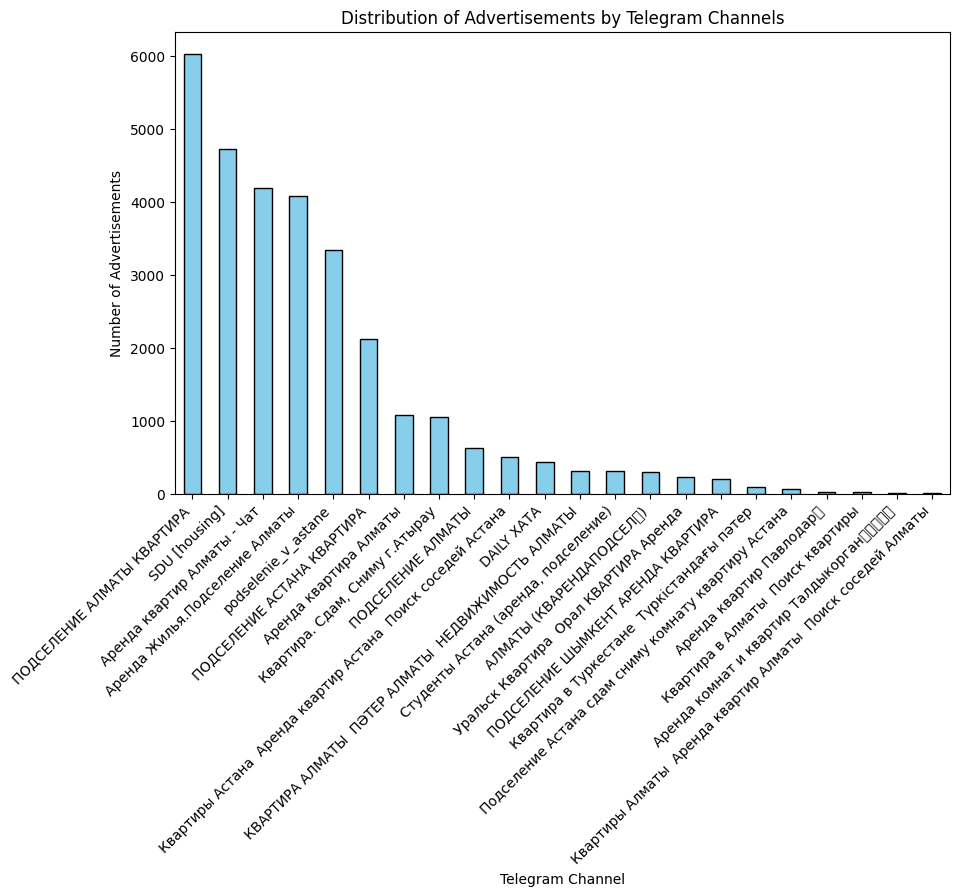

In [21]:
# 34. Распределение количества объявлений по каждому каналу

# Count the number of advertisements per channel
channel_distribution = df['channel_name'].value_counts()

# Plot the distribution of advertisements by Telegram channels
plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Advertisements by Telegram Channels')
plt.xlabel('Telegram Channel')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127747 (\N{NIGHT WITH STARS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from current font

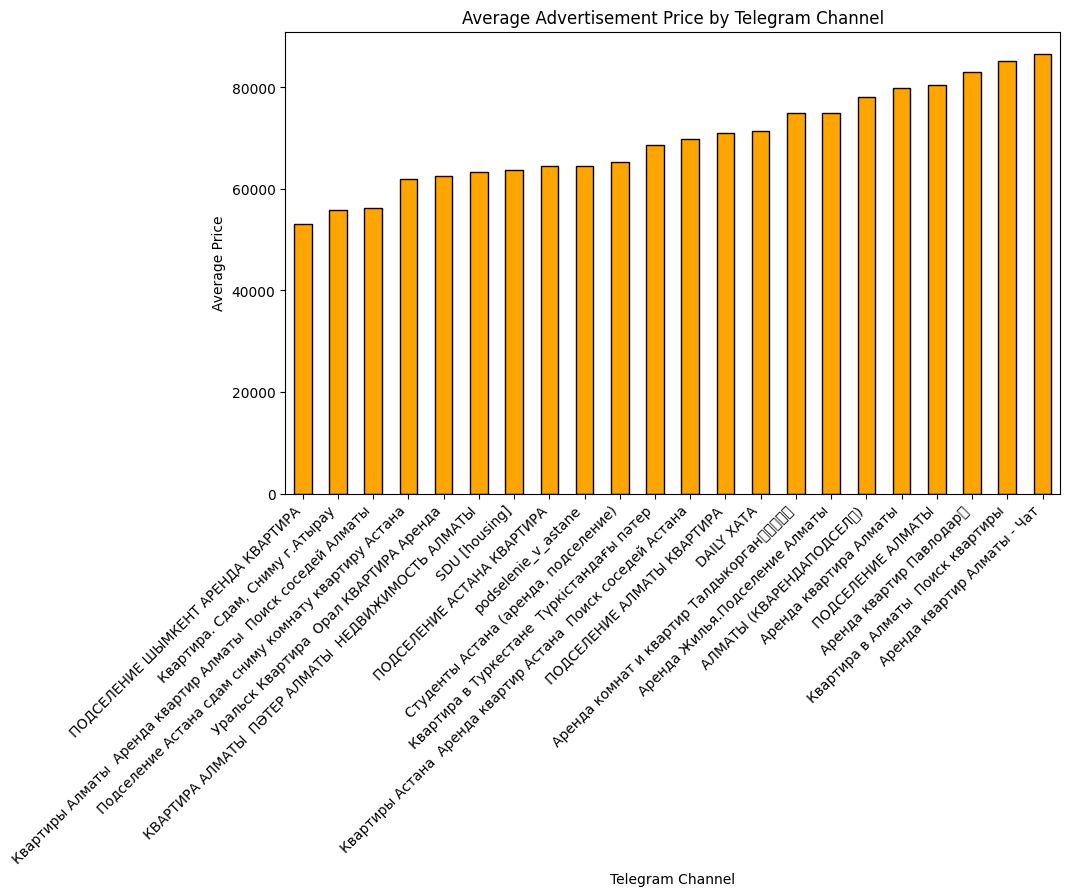

In [22]:
# 35. Средняя стоимость объявлений для каждого канала

# Calculate the average cost of advertisements per channel
avg_cost_by_channel = df.groupby('channel_name')['cost'].mean().sort_values()

# Plot the average cost of advertisements by Telegram channel
plt.figure(figsize=(10, 6))
avg_cost_by_channel.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Advertisement Price by Telegram Channel')
plt.xlabel('Telegram Channel')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()


In [23]:
# 36 # Каналы с самой высокой и самой низкой средней ценой

# Identify the channels with the highest and lowest average prices
max_channel = avg_cost_by_channel.idxmax()
min_channel = avg_cost_by_channel.idxmin()
max_price = avg_cost_by_channel.max()
min_price = avg_cost_by_channel.min()

print(f"Channel with the highest average price: {max_channel} ({max_price:.2f})")
print(f"Channel with the lowest average price: {min_channel} ({min_price:.2f})")

Channel with the highest average price: Аренда квартир Алматы - Чат (86636.57)
Channel with the lowest average price: ПОДСЕЛЕНИЕ ШЫМКЕНТ АРЕНДА КВАРТИРА (53091.65)


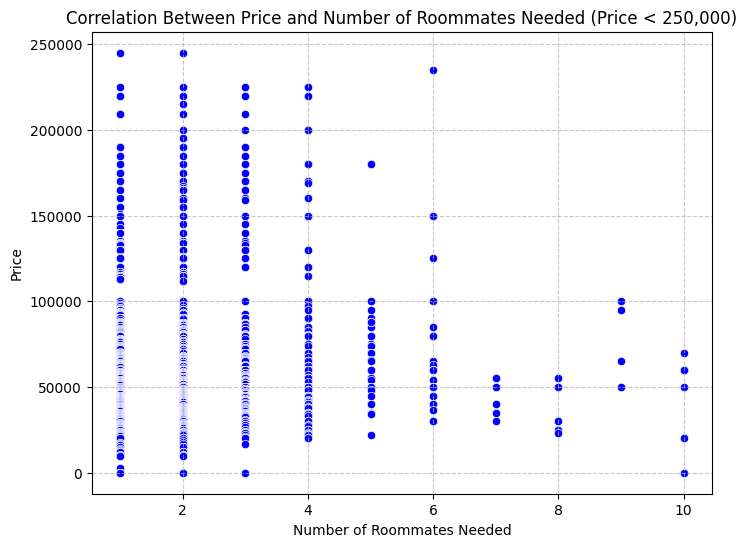

In [24]:
# 37. Корреляция между ценой и количеством необходимых соседей

# Filter the data to include only listings with a cost less than 250,000
filtered_df = df[df['cost'] < 250000.0]

# Plot the correlation between price and number of roommates needed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='people_needed', y='cost', data=filtered_df, color='blue')
plt.title('Correlation Between Price and Number of Roommates Needed (Price < 250,000)')
plt.xlabel('Number of Roommates Needed')
plt.ylabel('Price')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

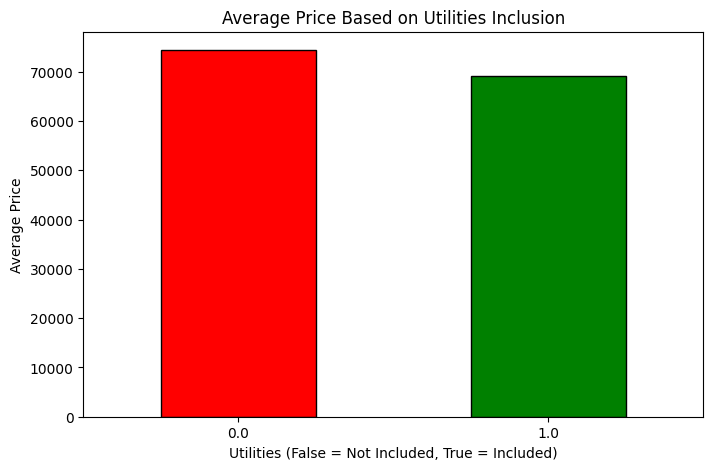

In [25]:
# 38. Корреляция между наличием включённых коммунальных услуг и средней ценой

# Calculate the average cost based on the presence of utilities
avg_cost_by_utilities = df.groupby('utilities')['cost'].mean()

plt.figure(figsize=(8, 5))
# Plot the average cost based on utility inclusion as a bar chart
avg_cost_by_utilities.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title('Average Price Based on Utilities Inclusion')
plt.xlabel('Utilities (False = Not Included, True = Included)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25964\4235986073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['message_length'] = filtered_df['message'].str.split().str.len()


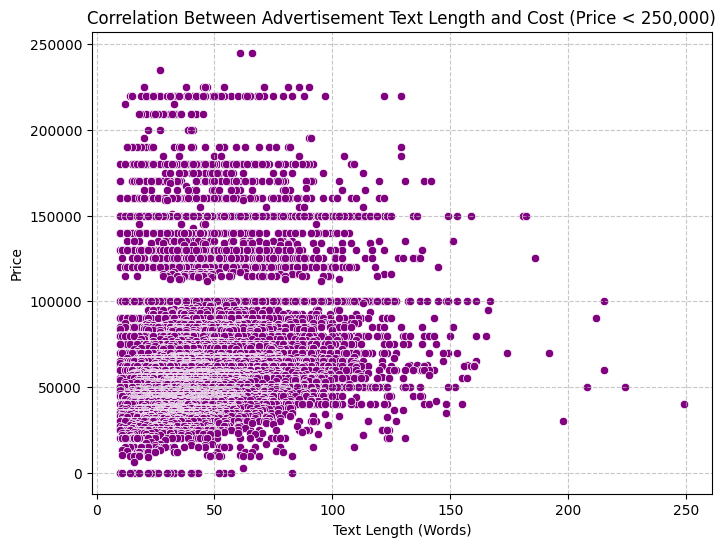

In [49]:
# Filter the data to include only listings with a cost less than 250,000
filtered_df = df[df['cost'] < 250000.0]

# Calculate the length of the message text (in words)
filtered_df['message_length'] = filtered_df['message'].str.split().str.len()

# Plot the correlation between message length and cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='message_length', y='cost', data=filtered_df, color='purple')
plt.title('Correlation Between Advertisement Text Length and Cost (Price < 250,000)')
plt.xlabel('Text Length (Words)')
plt.ylabel('Price')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

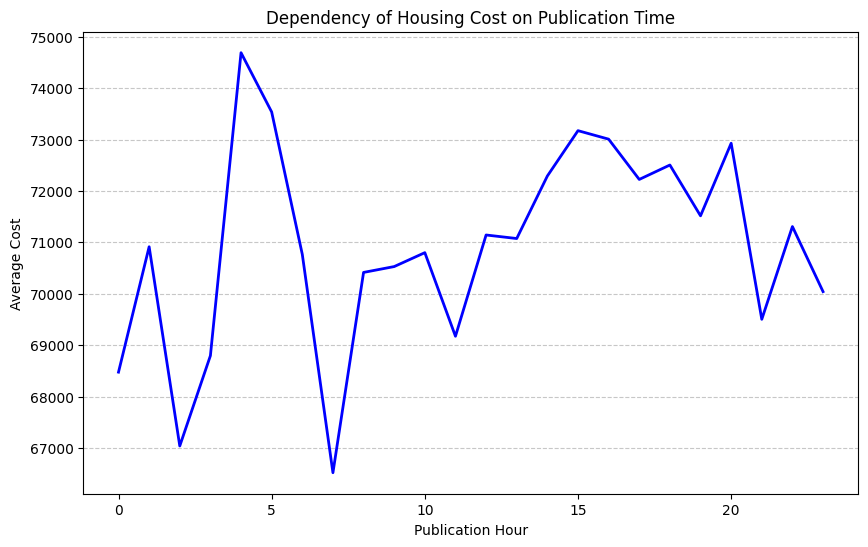

In [27]:
# Check the data and calculate the average housing cost by publication time
avg_cost_by_hour = df.groupby(df['date'].dt.hour)['cost'].mean()

# Plot the dependency of housing cost on publication time
plt.figure(figsize=(10, 6))
avg_cost_by_hour.plot(kind='line', color='blue', linewidth=2)
plt.title('Dependency of Housing Cost on Publication Time')
plt.xlabel('Publication Hour')
plt.ylabel('Average Cost')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()